https://www.advancedsportsanalytics.com/nba-raw-data

NBA Seasons 2019-2022

In [313]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. Data Wrangling & Cleaning

In [314]:
#import data
df = pd.read_csv('ASA All NBA Raw Data.csv',usecols = ['game_date','pts','Team_Score','player','Team_Abbrev','minutes','starter','season','Opponent_Score'],parse_dates=True).sort_values(by='game_date')

In [315]:
df.shape

(121107, 9)

In [316]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)

In [317]:
len(df['player'].unique())

818

# Deciding what data to use
## Things to consider

1. The independent variables in this problem are the individual players. There are 818 unique players from season 2020 to 2022.

2. I will be using additive modeling so if I use every player in the model, I would have 818 independent variables which is too many. I WANT TO LIMIT THE MODEL TO THE TOP 3-5 PLAYERS (INDEPENDENT VARIABLES) with respect to MINUTES PLAYED.

3. Also, I want to tailor this problem so that the selected players are on the same team for all 3 seasons. This can be difficult if players are traded in between seasons. So the size of my dataset can be constrained if the players of interest are not on the same team for each of the seasons.

4. To increase the size of my dataset, I will need to find filter for the list of players that were active players on the same team for all 3 seasons.

In [318]:
season2020 = df[df['season'] == 2020]
season2020 = season2020[['player','Team_Abbrev']]
season2020.drop_duplicates(inplace=True)
season2020_dict = season2020.set_index('player').T.to_dict('list')

C:\Users\theri\AppData\Local\Temp/ipykernel_22320/149751513.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  season2020_dict = season2020.set_index('player').T.to_dict('list')


In [319]:
season2021 = df[df['season'] == 2021]
season2021 = season2021[['player','Team_Abbrev']]
season2021.drop_duplicates(inplace=True)
season2021_dict = season2021.set_index('player').T.to_dict('list')

C:\Users\theri\AppData\Local\Temp/ipykernel_22320/603178093.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  season2021_dict = season2021.set_index('player').T.to_dict('list')


In [320]:
season2022 = df[df['season'] == 2022]
season2022 = season2022[['player','Team_Abbrev']]
season2022.drop_duplicates(inplace=True)
season2022_dict = season2022.set_index('player').T.to_dict('list')

C:\Users\theri\AppData\Local\Temp/ipykernel_22320/1516317564.py:4: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  season2022_dict = season2022.set_index('player').T.to_dict('list')


In [321]:
def loyal_players(arg1,arg2,arg3):
    
    '''
    arg1: dictionary mapping players to teams for 2020 season
    arg2: dictionary mapping players to teams for 2021 season
    arg3: dictionary mapping players to teams for 2022 season
    '''
    #create empty dict for holding matching key/value pairs for 2020 and 2021 season
    new_dict = {}
    
    #compare key value pairs between 2020 and 2021 seasons
    for key in arg1.keys():
        if key in arg2.keys():
            if arg1[key] == arg2[key]:
                new_dict[key] = arg2[key]
            else:
                print('player not on same team')
        else:
            print('player not in next season dict')
    
    #create empty dict for storing matching key/value pairs between new_dict and 2022 season
    final_dict = {}
    
    #compare key value pairs between new_dict and 2022 seasons
    for key in new_dict.keys():
        if key in arg3.keys():
            if new_dict[key] == arg3[key]:
                final_dict[key] = arg3[key]
            else:
                print('player not on same team')
        else:
            print('player not on same team')
            
    return(final_dict)
            
        
#run function
loyal = loyal_players(season2020_dict, season2021_dict, season2022_dict)

#create empty dataframe
loyal_df = pd.DataFrame()

#assign keys and values of resulting dictionary as columns in empty dataframe
loyal_df['players'] = loyal.keys()
loyal_df['teams'] = loyal.values()

#convert values for 'teams' field from list to string
team_lst = []
for i in range(0,loyal_df.shape[0]):
    join = ' '.join(str(e) for e in loyal_df['teams'][i])
    team_lst.append(join)

#assign resulting list of strings as field values for 'teams' field
loyal_df['teams'] = team_lst

player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not in next season dict
player not in next season dict
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not in next season dict
player not in next season dict
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player not in next season dict
player not on same team
player not on same team
player not in next season dict
player not in next season dict
player not on same team
player not in next season dict
player not on same team
player not on same team
player not on same team
player not on same team
player not on same team
player n

In [322]:
#show players for the MIL team who were starters that played all 3 seasons together
MIL_team = loyal_df[loyal_df['teams'] == 'MIL']

### Something to think about

#### Are teams with more loyal players on the roster more likely to win games than teams with less loyal players on the roster?

In [323]:
MIL_team

,players,teams
103,Giannis Antetokounmpo,MIL
104,Pat Connaughton,MIL
108,Khris Middleton,MIL
111,Brook Lopez,MIL
121,Thanasis Antetokounmpo,MIL


In [324]:
#filter for desired NBA Team in original dataset
df_bucks = df[df['Team_Abbrev'] == 'MIL']  

df_bucks.reset_index(inplace = True, drop=True)

#filter for only the loyal players
for i in range(0,df_bucks.shape[0]):
    if df_bucks['player'][i] not in list(MIL_team['players'].unique()):
        df_bucks = df_bucks.drop(index=i)
    else:
        print('%s is on the list' % (df_bucks['player'][i]))

df_bucks.reset_index(inplace=True, drop=True)

Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Brook Lopez is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Brook Lopez is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Brook Lopez is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaugh

Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Brook Lopez is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Brook Lopez is on the list
Pat Conna

Brook Lopez is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Brook Lopez is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Brook Lopez is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Brook Lopez is on the list
Pat Connaughton is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Brook Lopez is on the list
Khris Middleton is on the list
Khris Middleton is on the list
Brook Lopez is on the list
Thanasis Antetokounmpo is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Brook Lopez is on the list
Pat Connaughton is on the list
Brook Lopez is on the list
Khris Midd

Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Thanasis Antetokounmpo is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Khris Middleton is on the list
Thanasis Antetokounmpo is on the list
Pat Connaughton is on the list
Giannis Antetokounmpo is on the list
Khris Middleton is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Thanasis Antetokounmpo is on the list
Khris Middleton is on the list
Giannis Antetokounmpo is on the list
Pat Connaughton is on the list
Thanasis A

In [325]:
df_bucks.shape

(1097, 9)

In [326]:
#group by player and get total minutes per player for the season

#groupby
df_mins_per_player = df_bucks.groupby(by=['player'],as_index=False).agg(sum_mins = ('minutes','sum'))

#sort by mins in descending
df_mins_per_player.sort_values(by='sum_mins',inplace=True,ascending=False)

In [327]:
df_mins_per_player

,player,sum_mins
2,Khris Middleton,7540.100000
1,Giannis Antetokounmpo,7210.800000
3,Pat Connaughton,5225.033333
0,Brook Lopez,5011.600000
4,Thanasis Antetokounmpo,1197.450000


In [328]:
df_bucks.corr()

,Team_Score,Opponent_Score,starter,pts,season,minutes
Team_Score,1.000000,0.198037,0.022067,0.101507,-0.066574,-0.029549
Opponent_Score,0.198037,1.000000,-0.001392,0.028771,0.104669,0.011798
starter,0.022067,-0.001392,1.000000,0.701643,-0.060055,0.738847
pts,0.101507,0.028771,0.701643,1.000000,-0.000988,0.758087
season,-0.066574,0.104669,-0.060055,-0.000988,1.000000,-0.008675
minutes,-0.029549,0.011798,0.738847,0.758087,-0.008675,1.000000


In [329]:
#get first n players
players_of_interest = list(df_mins_per_player['player'].unique())

In [330]:
#get subset of main dataset that only contains players that are in the players of interest list

df_bucks.reset_index(inplace=True,drop=True)

for i in range(0,df_bucks.shape[0]):
    if df_bucks['player'][i] not in players_of_interest:
        df_bucks.drop(i,axis=0,inplace=True)

In [331]:
df_bucks['player'].unique()

array(['Giannis Antetokounmpo', 'Pat Connaughton', 'Khris Middleton',
       'Brook Lopez', 'Thanasis Antetokounmpo'], dtype=object)

In [332]:
df_bucks.drop_duplicates(inplace=True)

In [333]:
df_bucks.shape

(1097, 9)

## The Data

For each game, the head coach decides to play each of the players for a certain amount of time (minutes). Therefore, time can be considered as a form of currency and a coach essentially has 48 minutes max that he can spend on each player. For each game, we can observe how many minutes the head coach spends on each player. So if we were to observe the data at this point, we would see each player's name as a column along with the number of minutes per game under each column. There would also be a column (e.g. Game Points) that shows the total number of points scored by the player in each game.


## The Question

How many of the total points per game were influenced by each of the players' time in the game?

What is the baseline? The number of pts scored if none of the 3 players are playing

In [368]:
df_bucks

,game_date,Team_Abbrev,Team_Score,Opponent_Score,player,starter,pts,season,minutes
0,2019-10-24,MIL,117,111,Giannis Antetokounmpo,1,30,2020,28.166667
1,2019-10-24,MIL,117,111,Pat Connaughton,0,10,2020,16.800000
2,2019-10-24,MIL,117,111,Khris Middleton,1,11,2020,33.333333
3,2019-10-24,MIL,117,111,Brook Lopez,1,11,2020,26.883333
4,2019-10-26,MIL,126,131,Pat Connaughton,0,0,2020,13.033333
5,2019-10-26,MIL,126,131,Khris Middleton,1,25,2020,37.383333
6,2019-10-26,MIL,126,131,Giannis Antetokounmpo,1,29,2020,36.633333
7,2019-10-26,MIL,126,131,Brook Lopez,1,12,2020,34.650000
8,2019-10-28,MIL,129,112,Brook Lopez,1,16,2020,27.600000
9,2019-10-28,MIL,129,112,Giannis Antetokounmpo,1,14,2020,29.200000


In [400]:
# df_minutesot table so players, final score and game date are fields
df_minutes = df_bucks.pivot(index=['game_date'],columns='player', values=['minutes'])

df_minutes.fillna(0,inplace=True)

# reset index to remove indexed columns
df_minutes.reset_index(inplace=True)

#drop multiindex from df_minutesot
df_minutes.columns = df_minutes.columns.droplevel()

#rename columns
df_minutes.columns = ['date','Brook Lopez','Giannis Antetokounmpo','Khris Middleton','Pat Connaughton','Thanasis Antetokounmpo']

In [401]:
df_grpby = df_bucks.groupby(by=['game_date'],as_index = False).agg(sum_pts = ('pts','sum'))

In [402]:
df_grpby.head()

,game_date,sum_pts
0,2019-10-24,62
1,2019-10-26,66
2,2019-10-28,68
3,2019-10-30,64
4,2019-11-01,54


In [403]:
df_minutes['Total_Pts'] = df_grpby['sum_pts']

In [404]:
df_minutes

,date,Brook Lopez,Giannis Antetokounmpo,Khris Middleton,Pat Connaughton,Thanasis Antetokounmpo,Total_Pts
0,2019-10-24,26.883333,28.166667,33.333333,16.800000,0.000000,62
1,2019-10-26,34.650000,36.633333,37.383333,13.033333,0.000000,66
2,2019-10-28,27.600000,29.200000,28.683333,20.916667,0.000000,68
3,2019-10-30,26.900000,34.633333,33.883333,21.316667,0.000000,64
4,2019-11-01,25.250000,30.266667,20.383333,16.383333,6.450000,54
5,2019-11-02,26.266667,36.433333,33.700000,0.000000,0.000000,58
6,2019-11-04,25.666667,26.700000,27.050000,16.033333,0.000000,69
7,2019-11-06,32.033333,35.716667,33.050000,13.966667,0.000000,62
8,2019-11-08,16.583333,36.433333,37.516667,0.000000,0.000000,61
9,2019-11-10,30.766667,36.416667,22.516667,12.983333,0.000000,64


# 2. Define & Train Model

In [405]:
#import ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import accuracy_score, confusion_matrix

In [407]:
#define predictor and response variables
X = df_minutes.drop(['date','Total_Pts'],axis=1) #predictors
y= df_minutes['Total_Pts']              #response

In [410]:
df_minutes.corr()

,Brook Lopez,Giannis Antetokounmpo,Khris Middleton,Pat Connaughton,Thanasis Antetokounmpo,Total_Pts
Brook Lopez,1.000000,0.117421,0.293122,-0.043752,-0.213502,0.474169
Giannis Antetokounmpo,0.117421,1.000000,0.284397,-0.069880,-0.420179,0.614741
Khris Middleton,0.293122,0.284397,1.000000,-0.115135,-0.405034,0.585550
Pat Connaughton,-0.043752,-0.069880,-0.115135,1.000000,0.137225,0.008409
Thanasis Antetokounmpo,-0.213502,-0.420179,-0.405034,0.137225,1.000000,-0.360417
Total_Pts,0.474169,0.614741,0.585550,0.008409,-0.360417,1.000000


In [419]:
#define model
lr = LinearRegression()

#cross-validate model with data
cross_val_score(lr,X,y)

array([0.39300849, 0.5383679 , 0.64312568, 0.68805104, 0.70960779])

In [420]:
lr.fit(X, y) # refit the model with the complete dataset
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)

Coefficients: [0.3826358  0.61391304 0.50922639 0.15962566 0.13347713]
Intercept: 16.865687668578985


# 3. Calculate Adjusted Contributions

In [ ]:
# add model weights(coefficients) and predictor variables to Series
weights = pd.Series(
    lr.coef_,
    index=X.columns
)

#assign model intercept to variable
base = lr.intercept_

#calculate unadjusted contributions and assign to dataframe
unadj_contributions = X.mul(weights).assign(Base=base)

#calculate adjusted contributions assign to dataframe
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    ) # contains all contributions for each day

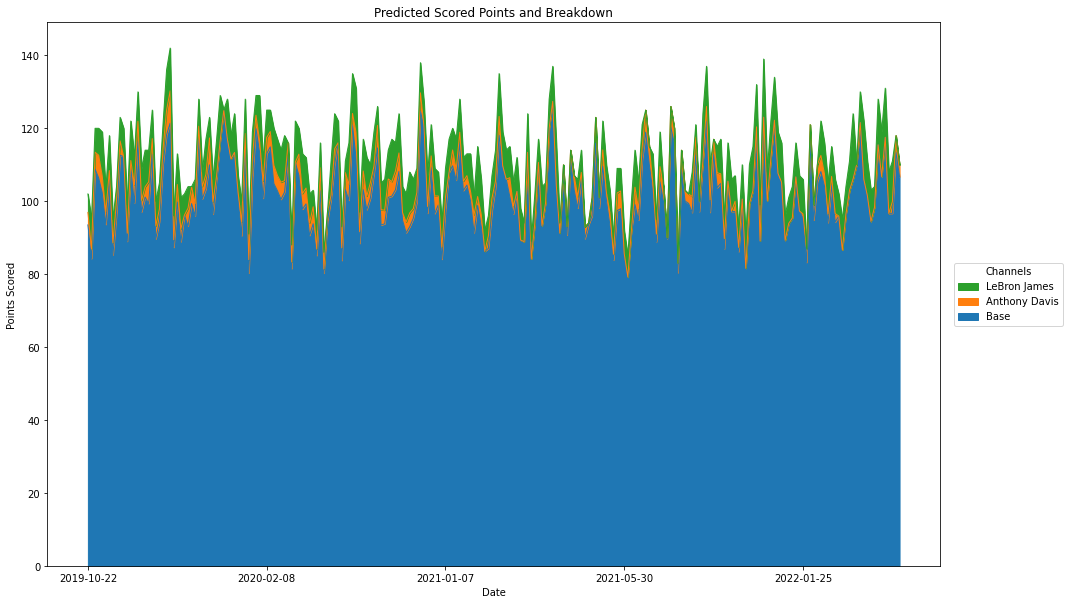

In [203]:
ax = (adj_contributions[['Base','Anthony Davis', 'LeBron James']]
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Scored Points and Breakdown',
          ylabel='Points Scored',
          xlabel='Date')
     )
handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

# Computing Return on Investment

Which Player was better in terms of ROI (efficiency)

In [205]:
pts_from_james = adj_contributions['LeBron James'].sum()

spendings_on_james = piv['LeBron James'].sum()
james_roi = pts_from_james / spendings_on_james


In [206]:
james_roi

0.30689923210194353

In [207]:
pts_from_davis = adj_contributions['Anthony Davis'].sum()

spendings_on_davis = piv['Anthony Davis'].sum()
davis_roi = pts_from_davis / spendings_on_davis

In [208]:
davis_roi

0.14884483913113591